In [ ]:
## Plot the hypergeometric distribution

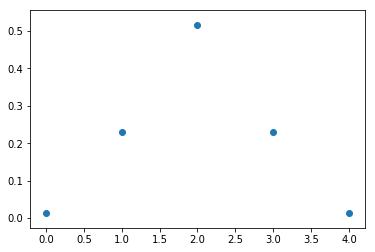

In [79]:
import numpy as  np
import scipy.stats as stats
import matplotlib.pyplot as plt

[N, n, K] = [8, 4, 4]
X = stats.hypergeom(N, n, K)

x = range(5)

plt.scatter(x, X.pmf(x))


In [80]:
## now compute the p-value
# a is the number of MF the lady got right, N is the number of cups, K is the number of MF in the population of cups, n is the number of draws
def ladytea(a, N, n, K):
    X = stats.hypergeom(N, n, K)
    p = sum([X.pmf(i) for i in range(a, N)])
    return p

p = ladytea(3,8,4,4)
print(p)

0.24285714285714263


In [81]:
# Now load a data set.
import pandas as pd

df = pd.read_csv('smoking_cvd.csv')

# form contigency table
ct = pd.crosstab(df['Smoking'], df['CVD'])
[t, pval, dof, expcounts] =stats.chi2_contingency(ct)

print(t, pval, dof, expcounts)

101.22017433279626 8.230675615562138e-24 1 [[196.62 142.38]
 [ 93.38  67.62]]


In [82]:
# permutation testing now
#x = smoking
#y = cvd
x =df['Smoking']
y =df['CVD']
N =len(x)

#prob_x0y0 = sum(x==0 && y==0)
n00 = sum([x[i]==0 and y[i]==0 for i in range(N)])
n01 = sum([x[i]==0 and y[i]==1 for i in range(N)])
n10 = sum([x[i]==1 and y[i]==0 for i in range(N)])
n11 = sum([x[i]==1 and y[i]==1 for i in range(N)])

print(n00, n01, n10, n11)
[p00, p01, p10, p11] = [x/N for x in [n00, n01, n10, n11]]
print(p00, p01, p10, p11)

# marginals
p0x = p00+p01
p0y = p00+p10
p1x = p10+p11
p1y = p01+p11
print(p0x, p0y, p1x, p1y)

# expected counts
e00 = p0x*p0y*N
e01 = p0x*p1y*N
e10 = p1x*p0y*N
e11 = p1x*p1y*N
e =[e00, e01, e10, e11]

#T(x)= (expected counts - observed counts)^2/observed counts

diff = [n00-e00, n01-e01, n10-e10, n11-e11]
sqdiff = [d**2 for d in diff]
ti = [sqdiff[i]/e[i] for i in range(4)]
t = sum(ti)


T = stats.t(df=1)
pvalue  = 1 -T.cdf(t)
print(pvalue)




249 90 41 120
0.498 0.18 0.082 0.24
0.6779999999999999 0.58 0.322 0.42
0.003084880858766237


In [83]:
# permutation testing

def tstatistic(x, y):
    N =len(x)

    #prob_x0y0 = sum(x==0 && y==0)
    n00 = sum([x[i]==0 and y[i]==0 for i in range(N)])
    n01 = sum([x[i]==0 and y[i]==1 for i in range(N)])
    n10 = sum([x[i]==1 and y[i]==0 for i in range(N)])
    n11 = sum([x[i]==1 and y[i]==1 for i in range(N)])

    #print(n00, n01, n10, n11)
    [p00, p01, p10, p11] = [x/N for x in [n00, n01, n10, n11]]
    
   # print(p00, p01, p10, p11)

    # marginals
    p0x = p00+p01
    p0y = p00+p10
    p1x = p10+p11
    p1y = p01+p11
    #print(p0x, p0y, p1x, p1y)

    # expected counts
    e00 = p0x*p0y*N
    e01 = p0x*p1y*N
    e10 = p1x*p0y*N
    e11 = p1x*p1y*N
    e =[e00, e01, e10, e11]
    #print(e)
    #T(x)= (expected counts - observed counts)^2/observed counts

    diff = [n00-e00, n01-e01, n10-e10, n11-e11]
    sqdiff = [d**2 for d in diff]
    ti = [sqdiff[i]/e[i] for i in range(4)]
    t = sum(ti)
    return t

0.0


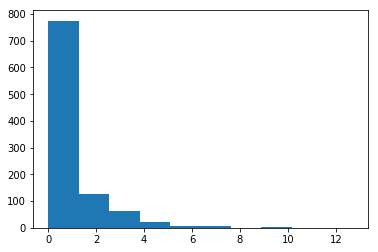

In [84]:
nperms =1000
ts = [0]*nperms
for i in range(nperms):
    x_ = np.random.permutation(x);
    ts[i] = tstatistic(x_, y);

plt.hist(ts, 10)    
t = tstatistic(x, y)

pval = sum(ts>t)/nperms
print(pval)
